<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/SimpleAutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()
mnist_data = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 11468181.00it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 340445.72it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3149605.61it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8493325.35it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([1, 28, 28])


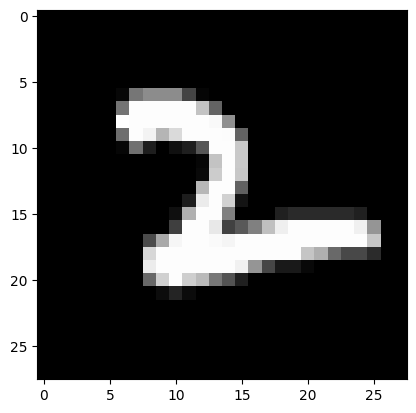

In [23]:
image,label = next(iter(data_loader))
print(image[0].shape)
plt.imshow(image[0].squeeze())

In [5]:
class Autoencoder(nn.Module):

  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3)
    )
    self.decoder = nn.Sequential(
        nn.Linear(3, 12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
    )

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



In [10]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [18]:
num_epochs = 14
outputs = []
for epoch in range(num_epochs):
  for (img,_) in data_loader:
    img = img.reshape(-1,28*28)
    reconstructed_image = model(img)
    loss = criterion(reconstructed_image,img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"epoch: {epoch}, loss: {loss.item()}")
  outputs.append((epoch,img,reconstructed_image))


epoch: 0, loss: 0.03150729835033417
epoch: 1, loss: 0.03062291443347931
epoch: 2, loss: 0.02586110308766365
epoch: 3, loss: 0.033299289643764496
epoch: 4, loss: 0.032681986689567566
epoch: 5, loss: 0.031845301389694214
epoch: 6, loss: 0.030304837971925735
epoch: 7, loss: 0.02868041954934597
epoch: 8, loss: 0.027097415179014206
epoch: 9, loss: 0.03004704974591732
epoch: 10, loss: 0.028935350477695465
epoch: 11, loss: 0.0344875305891037
epoch: 12, loss: 0.02684536762535572
epoch: 13, loss: 0.032996147871017456


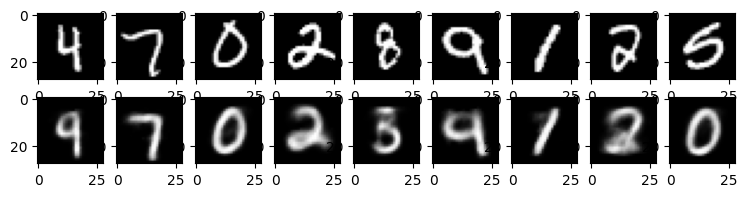

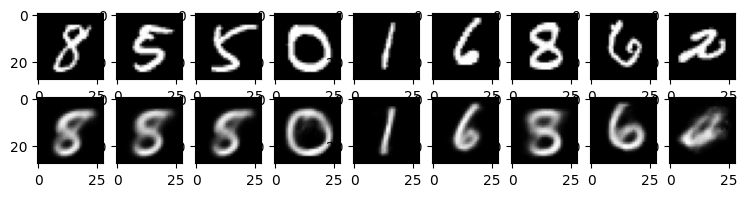

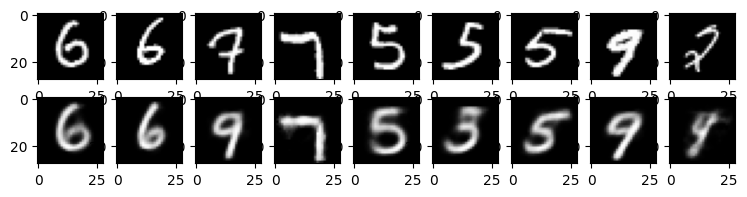

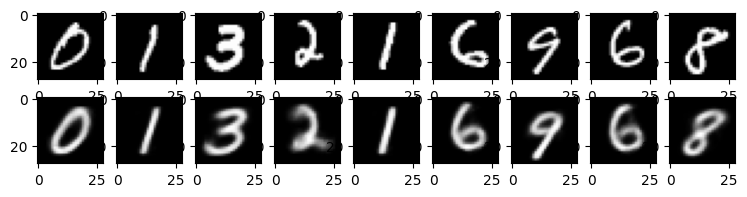

In [19]:
for k in range(0,num_epochs,4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  reconstucted = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >=9:break
    plt.subplot(2,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])
  for i, item in enumerate(reconstucted):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])



In [37]:
class AutoencoderCNN(nn.Module):

  def __init__(self):
    super().__init__()
    self.encoder = nn.Sequential(
        nn.Conv2d(1,16,3),
        nn.ReLU(),
        nn.Conv2d(16,32,3),
        nn.ReLU(),
        nn.Conv2d(32,64,7)
    )
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(64,32,7), # 32, 7, 7
        nn.ReLU(),
        nn.ConvTranspose2d(32,16,3),
        nn.ReLU(),
        nn.ConvTranspose2d(16,1,3),
        nn.Sigmoid()
    )

  def forward(self,x):
    x = x.reshape(-1, 1, 28, 28)
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded



In [38]:
model = AutoencoderCNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [42]:
num_epochs = 4
outputs = []
for epoch in range(num_epochs):
  for (img,_) in data_loader:
    img = img.reshape(-1, 1, 28, 28)
    reconstructed_image = model(img)
    loss = criterion(reconstructed_image,img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f"epoch: {epoch}, loss: {loss.item()}")
  outputs.append((epoch,img,reconstructed_image))


epoch: 0, loss: 0.0003949565580114722
epoch: 1, loss: 0.00011429631558712572
epoch: 2, loss: 7.036579336272553e-05
epoch: 3, loss: 0.00022498959151562303


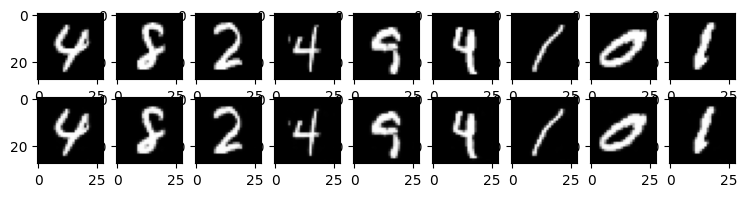

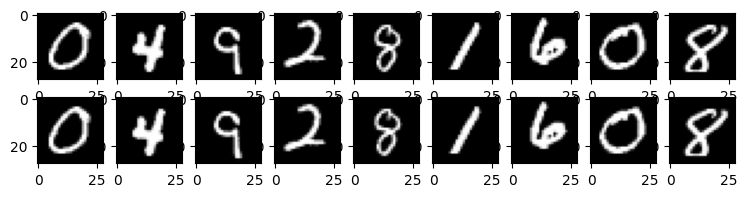

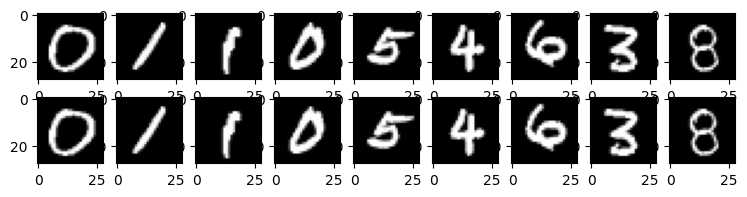

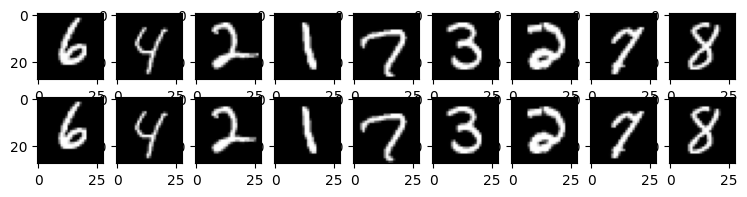

In [43]:
for k in range(0,num_epochs):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  reconstucted = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >=9:break
    plt.subplot(2,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])
  for i, item in enumerate(reconstucted):
    if i>=9: break
    plt.subplot(2,9,9+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

